In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

### 两种定义箭头路径的方式

### 1）、两点连线：

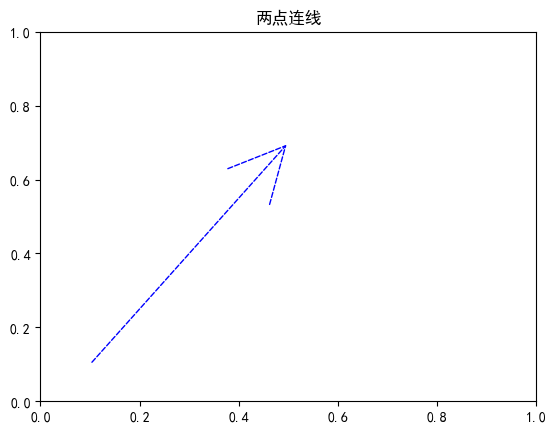

In [3]:
from matplotlib.patches import FancyArrowPatch

fig, ax = plt.subplots()

# 创建FancyArrowPatch实例并添加到轴
arrow = FancyArrowPatch((0.1, 0.1),          # 箭头的起点坐标
                        (0.5, 0.7),          # 箭头的终点坐标
                        arrowstyle="->",     # 设置箭头样式为简单箭头（尾部线+头部箭头）
                        mutation_scale=100,  # 缩放箭头的整体大小，值越大箭头越大
                        linestyle='--',      # 箭身的线型
                        color='blue'         # 箭头的颜色
                       )
# 将创建的箭头添加到轴上
ax.add_patch(arrow)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.title('两点连线')
plt.show()

### 2）、自定义路径：

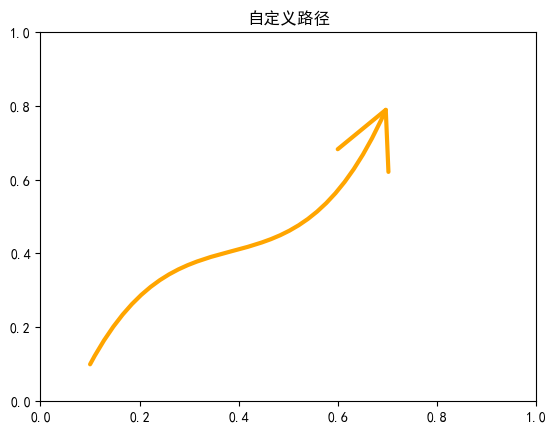

In [4]:
from matplotlib.patches import FancyArrowPatch
from matplotlib.path import Path

# 创建自定义路径箭头
fig, ax = plt.subplots()

# 定义自定义路径
# Path的第一个参数是坐标点列表，定义路径的关键节点
# 第二个参数是路径代码列表，定义如何连接这些节点
path = Path([(0.1, 0.1), (0.3, 0.6), (0.5, 0.2), (0.7, 0.8)], 
            [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4])

# 使用自定义路径创建FancyArrowPatch实例
arrow = FancyArrowPatch(path=path,   # 指定使用上面定义的自定义路径作为箭头的轨迹
                        arrowstyle="->,head_length=0.4,head_width=0.2",  # 设置箭头样式
                        mutation_scale=100,   # 缩放箭头的整体大小，值越大箭头越大
                        linewidth=3,    # 箭头线的宽度
                        color='orange'  # 头的颜色
                       )

ax.add_patch(arrow)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.title('自定义路径')
plt.show()

# 2、使用示例：

### 示例 1：箭头样式

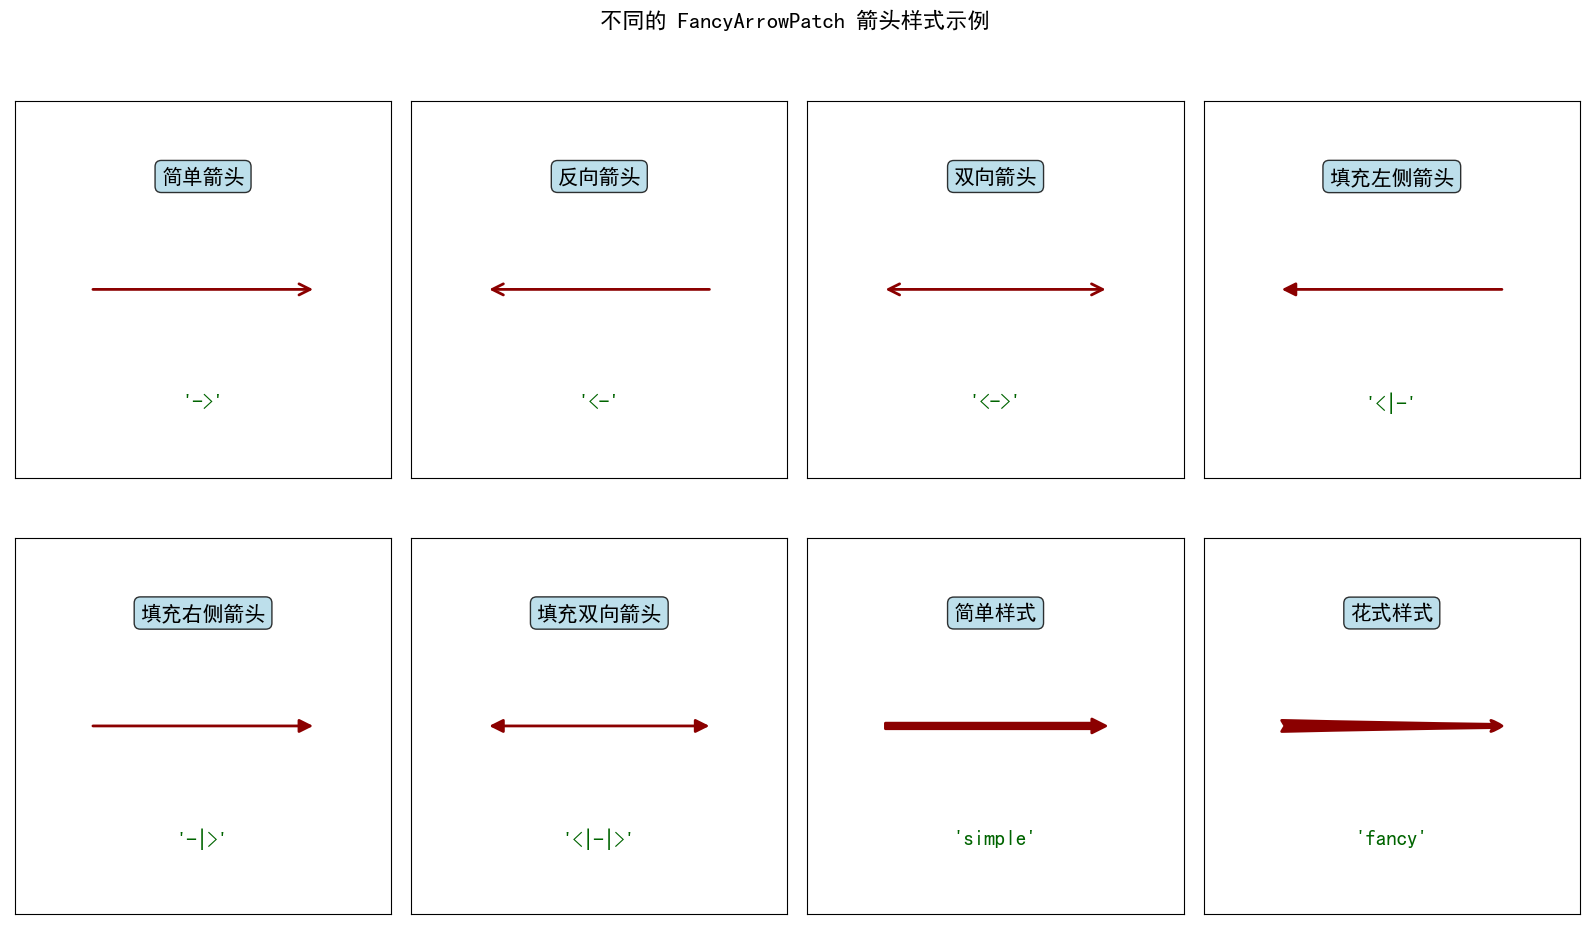

In [5]:
from matplotlib.patches import FancyArrowPatch

fig, axes = plt.subplots(2, 4, figsize=(16, 10))
fig.suptitle('不同的 FancyArrowPatch 箭头样式示例', fontsize=16, fontweight='bold')

# 定义要展示的箭头样式
arrow_styles = [
    ('->', '简单箭头'),
    ('<-', '反向箭头'), 
    ('<->', '双向箭头'),
    ('<|-', '填充左侧箭头'),
    ('-|>', '填充右侧箭头'),
    ('<|-|>', '填充双向箭头'),
    ('simple', '简单样式'),
    ('fancy', '花式样式')
]

# 绘制不同箭头样式的示例
for i, (style_name, title) in enumerate(arrow_styles):
    row = i // 4  # 计算行索引
    col = i % 4   # 计算列索引
    ax = axes[row, col]
    
    # 创建箭头样式不同的箭头
    arrow = FancyArrowPatch(
        (0.2, 0.5), (0.8, 0.5),    # 起点和终点
        arrowstyle=style_name,     # 设置箭头样式
        connectionstyle='arc3,rad=0.0',  # 使用简单的连接样式
        color='darkred',
        linewidth=2,
        mutation_scale=20
    )
    
    ax.add_patch(arrow)
    
    # 添加样式名称和说明
    ax.text(0.5, 0.8, title, ha='center', va='center', fontsize=15, 
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))
    ax.text(0.5, 0.2, f"'{style_name}'", ha='center', va='center', fontsize=15, 
            style='italic', color='darkgreen')
    
    # 设置子图属性
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### 示例 2：连接样式

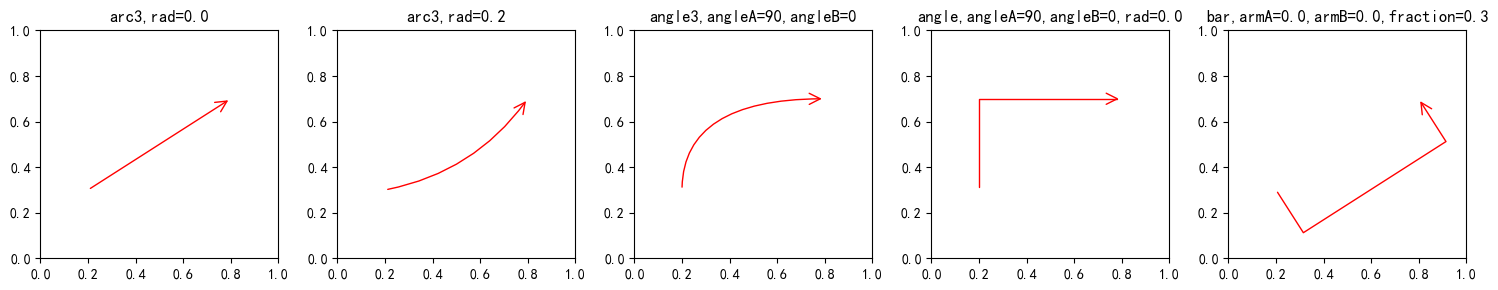

In [6]:
from matplotlib.patches import FancyArrowPatch

# 不同连接样式示例
connection_styles = [
    "arc3,rad=0.0",  # 圆弧连接，曲率半径为0（直线）
    "arc3,rad=0.2",  # 圆弧连接，曲率半径为0.2（小弧度）
    "angle3,angleA=90,angleB=0",  # 平滑角度连接，起点臂与x轴夹角90度，终点臂0度
    "angle,angleA=90,angleB=0,rad=0.0",  # 角度连接，带折角，无圆角
    "bar,armA=0.0,armB=0.0,fraction=0.3"  # 带横杆的连接，无延伸臂，横杆长度占比0.3
]

fig, axs = plt.subplots(1, len(connection_styles), figsize=(15, 3))

# 遍历每个连接样式，在对应的子图中绘制箭头
for i, conn_style in enumerate(connection_styles):
    arrow = FancyArrowPatch((0.2, 0.3), (0.8, 0.7),
                                   arrowstyle='->', # 箭头样式为简单箭头
                                   connectionstyle=conn_style,  # 应用当前循环的连接样式
                                   mutation_scale=20,
                                   color='red')
    axs[i].add_patch(arrow)
    axs[i].set_title(conn_style)
    axs[i].set_xlim(0, 1)
    axs[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

### 示例 3：箭头连接图形元素

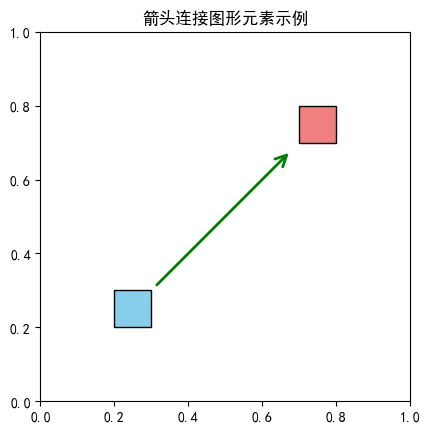

In [7]:
from matplotlib.patches import Rectangle,FancyArrowPatch

fig, ax = plt.subplots()

# 创建两个矩形作为起点和终点的附着对象
rect_start = Rectangle((0.2, 0.2), 0.1, 0.1, facecolor='skyblue', edgecolor='black')
rect_end = Rectangle((0.7, 0.7), 0.1, 0.1, facecolor='lightcoral', edgecolor='black')

# 将矩形添加到图表中
ax.add_patch(rect_start)
ax.add_patch(rect_end)

# 创建FancyArrowPatch，将其附着到两个矩形上，并设置收缩量
arrow = FancyArrowPatch(
    posA=(0.25, 0.25),   # 可以大致设定为矩形中心，但实际连接点由patchA/patchB决定
    posB=(0.75, 0.75),
    patchA=rect_start,   # 箭头起点附着到rect_start
    patchB=rect_end,     # 箭头终点附着到rect_end
    shrinkA=5,           # 起点收缩5点
    shrinkB=10,          # 终点收缩10点
    arrowstyle='->',
    mutation_scale=20,
    color='green',
    linewidth=2
)

ax.add_patch(arrow)

# 设置坐标轴范围
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')  # 确保比例相等，图形不变形
plt.title('箭头连接图形元素示例')
plt.show()

### 示例 4：标注图表元素

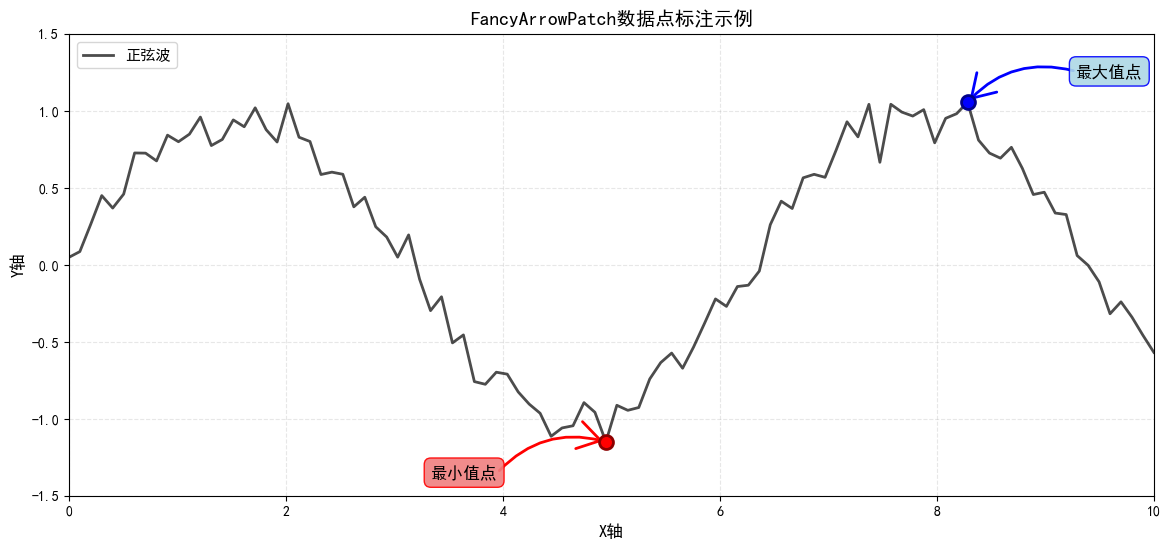

In [8]:
from matplotlib.patches import FancyArrowPatch

# 创建示例数据
np.random.seed(42)
x = np.linspace(0, 10, 100)
y1 = np.sin(x) + np.random.normal(0, 0.1, 100)

# 创建单个图表
fig, ax = plt.subplots(figsize=(14, 6))

# 绘制数据
ax.plot(x, y1, 'k-', label='正弦波', alpha=0.7, linewidth=2)

# 标注最大值点
max_idx = np.argmax(y1)
ax.plot(x[max_idx], y1[max_idx], 'bo', markersize=10, markeredgewidth=2, markeredgecolor='darkblue')

# 使用FancyArrowPatch标注最大值
arrow_max = FancyArrowPatch(
    (x[max_idx] + 1, y1[max_idx] + 0.2),  # 箭头起点
    (x[max_idx], y1[max_idx]),            # 箭头终点
    arrowstyle='->,head_width=0.5,head_length=0.8',
    connectionstyle='arc3,rad=0.3',
    color='blue',
    linewidth=2,
    mutation_scale=20
)
ax.add_patch(arrow_max)
ax.text(x[max_idx] + 1.0, y1[max_idx] + 0.2, '最大值点', 
         fontsize=12, ha='left', va='center', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.4", facecolor="lightblue", alpha=0.9, edgecolor='blue'))

# 标注最小值点
min_idx = np.argmin(y1)
ax.plot(x[min_idx], y1[min_idx], 'ro', markersize=10, markeredgewidth=2, markeredgecolor='darkred')

# 使用FancyArrowPatch标注最小值
arrow_min = FancyArrowPatch(
    (x[min_idx] - 1, y1[min_idx] - 0.2),  # 箭头起点
    (x[min_idx], y1[min_idx]),             # 箭头终点
    arrowstyle='->,head_width=0.5,head_length=0.8',
    connectionstyle='arc3,rad=-0.3',
    color='red',
    linewidth=2,
    mutation_scale=20
)
ax.add_patch(arrow_min)
ax.text(x[min_idx] - 1.0, y1[min_idx] - 0.2, '最小值点', 
         fontsize=12, ha='right', va='center', fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.4", facecolor="lightcoral", alpha=0.9, edgecolor='red'))

# 添加图表标题和标签
ax.set_title('FancyArrowPatch数据点标注示例', fontsize=14, fontweight='bold')
ax.set_xlabel('X轴', fontsize=12)
ax.set_ylabel('Y轴', fontsize=12)

# 添加图例和网格
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--')

# 设置坐标轴范围
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)
plt.show()